# Base de Dados

Instalando a biblioteca da basededados através do gerenciador de pacotes pip

In [1]:
!pip install basedosdados

In [2]:
import basedosdados as bd
#importando a biblioteca com o apelido de bd

In [3]:
import pandas as pd
#Importando a biblioteca pandas também com o apelido de pd

In [4]:
bd.list_datasets()
#Essa função lista todos os datasets disponíveis na biblioteca
#No nosso caso serve para darmos acesso da nossa conta Google (não sei direito como funciona)
#Ao rodar abra o link > dê acesso a sua conta > copia o código que eles disponibilizam > cole aqui e aperte enter

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=HJGFf01Gbz7MlPQTRsiLGmECcQnqh3&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWhvjhn-P1M1ukiJd0EhnAPvJMeq-IilqX320Xz2bpsSy8hNZ7glvi4

dataset_id: 
	br_abrinq_oca 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ana_atlas_esgotos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_anvisa_medicamentos_industrializados 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ba_feiradesantana_camara_leis 
---------------------------------------------------------------------

In [4]:
df_IPS = bd.read_table(dataset_id='br_rj_rio_de_janeiro_ipp_ips', 
            table_id='indicadores',
            billing_project_id='projeto4-317303')

#Rodando a base de dados
#O ID que eu coloquei ali foi um projeto que criei no Google Cloud
#loga aqui nesse link > https://console.cloud.google.com/projectselector2/home/dashboard
#Cria um novo projeto
#Clica no projeto e copia o id dele e troca no billing_project_id


Downloading: 100%|██████████| 99/99 [00:01<00:00, 54.26rows/s]


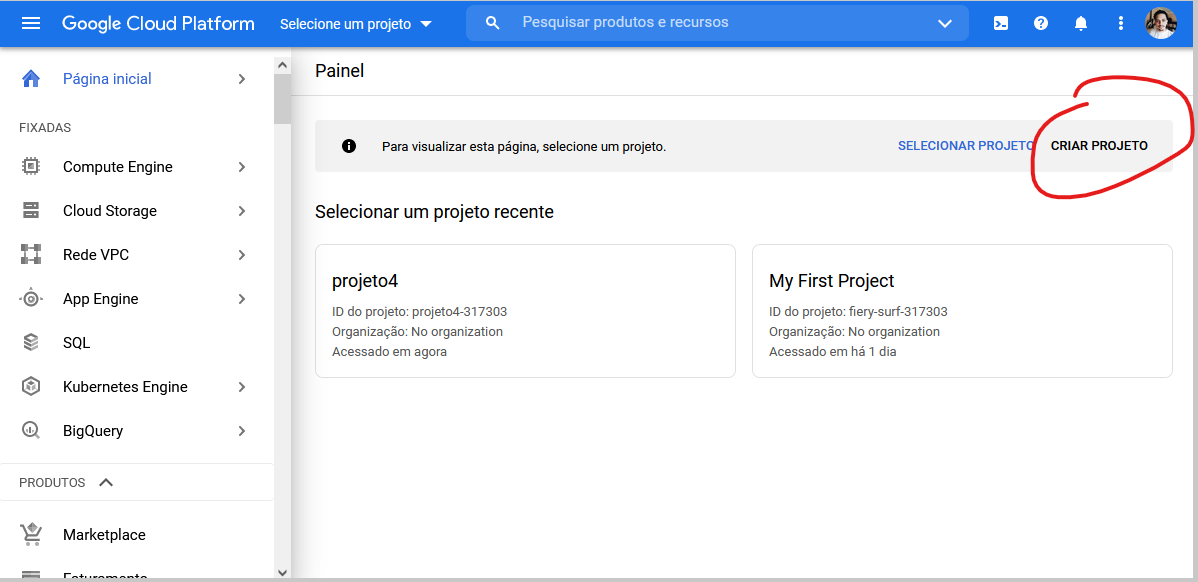

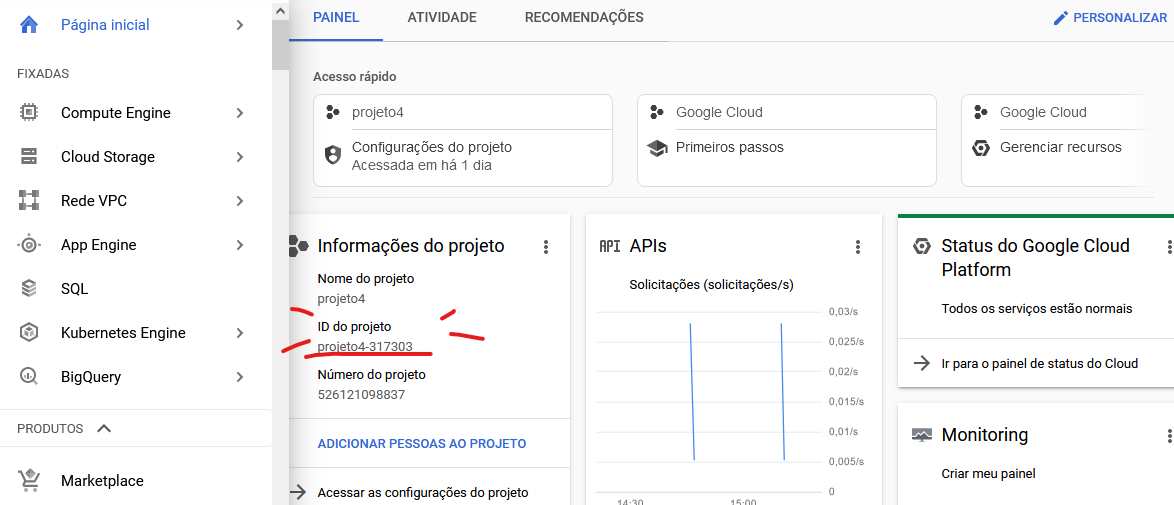

In [6]:
from google.colab import files

In [9]:
df_IPS.to_csv('IPS.csv', sep=',', index=False)

In [11]:
files.download('IPS.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Análise exploratória

In [ ]:
df_IPS.columns

In [ ]:
df_IPS.head(50)

In [ ]:
df_IPS.describe()

In [ ]:
df_IPS.info()

In [ ]:
pd.DataFrame(df_IPS['regiao_administrativa'].unique()).sort_values(0)

In [ ]:
colunas = ['ano', 'regiao_administrativa', 'mortalidade_infancia',
       'prop_baixo_peso_nascer', 'mortalidade_materna',
       'taxa_internacoes_infantis_crise_respiratoria_aguda',
       'prop_acesso_agua_canalizada', 'prop_acesso_esgotamento_sanitario',
       'prop_acesso_banheiro',
       'prop_populacao_vivendo_favelas_nao_urbanizadas',
       'prop_acesso_energia_eletrica',
       'prop_adensamento_habitacional_excessivo', 'taxa_homicidios',
       'taxa_roubos_rua', 'prop_alfabetizacao',
       'qualidade_ensino_fundamental_anos_iniciais',
       'qualidade_ensino_fundamental_anos_finais',
       'prop_abandono_escolar_ensino_medio',
       'prop_acesso_telefone_celular_fixo', 'prop_acesso_internet',
       'taxa_mortalidade_doencas_cronicas', 'taxa_incidencia_dengue',
       'taxa_mortalidade_tuberculose_hiv', 'prop_coleta_seletiva_lixo',
       'degradacao_areas_verdes', 'prop_mobilidade_urbana',
       'taxa_homicidios_acao_policial', 'tempo_medio_deslocamento',
       'taxa_participacao_politica', 'prop_gravidez_adolescencia',
       'trabalho_infantil', 'indice_acesso_cultura',
       'taxa_violencia_contra_mulher', 'taxa_homicidios_jovens_negros',
       'prop_vulnerabilidade_familiar', 'prop_pessoas_ensino_superior',
       'prop_negros_indigenas_ensino_superior',
       'prop_frequencia_ensino_superior']

In [ ]:
colunas = [
    'ano', 'regiao_administrativa', 'prop_acesso_internet', 'mortalidade_infancia', 
    'prop_baixo_peso_nascer', 'mortalidade_materna','taxa_internacoes_infantis_crise_respiratoria_aguda',
    'prop_acesso_agua_canalizada', 'prop_acesso_esgotamento_sanitario', 'prop_acesso_banheiro',
    'prop_populacao_vivendo_favelas_nao_urbanizadas', 'prop_acesso_energia_eletrica', 'prop_adensamento_habitacional_excessivo', 'taxa_homicidios',
    'taxa_roubos_rua' 
]
necessidades_humanas_basicas = df_IPS.filter(colunas)

In [ ]:
(
    necessidades_humanas_basicas[necessidades_humanas_basicas['ano'] == 2020]
    .groupby('regiao_administrativa')
    .sum(axis=1)
    .reset_index()  
)

In [ ]:
necessidades_humanas_basicas['Indice'] = necessidades_humanas_basicas[colunas].sum(axis=1)
necessidades_humanas_basicas.sort_values('regiao_administrativa')

# Perguntas